In [3]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import splitfolders
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
splitfolders.ratio('voice_image/', output='train_valid_test/', seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 197 files [00:00, 990.11 files/s] 


# 증식

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory(
        'train_valid_test/train',
        target_size=(64, 64),
        batch_size = 32,
        class_mode='categorical',
        shuffle = False)


Found 157 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        'train_valid_test/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 40 images belonging to 3 classes.


# 모델링

In [ ]:
model = Sequential()
input_shape=(64, 64, 3)#1st hidden layer

model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))

model.add(Activation('relu'))#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5)) #Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))#Output layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 15, 15, 32)        0         
_________________________________________________________________
activation_24 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_13 (Averag (None, 7, 7, 64)          0         
_________________________________________________________________
activation_25 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)             

### compile adam

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
hist = model.fit_generator(
        training_set,
        steps_per_epoch= 5,
        epochs= 500,
        validation_data=test_set, verbose = 1,
        callbacks=[tensorboard_callback])

Epoch 1/500
1/5 [=====>........................] - ETA: 0s - loss: 1.1192 - accuracy: 0.3125WARNING:tensorflow:From /Users/elie/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
5/5 [==============================] - 1s 171ms/step - loss: 1.1853 - accuracy: 0.3376 - val_loss: 1.0700 - val_accuracy: 0.5000
Epoch 2/500
5/5 [==============================] - 1s 124ms/step - loss: 1.0871 - accuracy: 0.4968 - val_loss: 1.0564 - val_accuracy: 0.5000
Epoch 3/500
5/5 [==============================] - 1s 129ms/step - loss: 1.0590 - accuracy: 0.5032 - val_loss: 1.0364 - val_accuracy: 0.5000
Epoch 4/500
5/5 [==============================] - 1s 160ms/step - loss: 1.0308 - accuracy: 0.5032 - val_loss: 1.0140 - val_accuracy: 0.5000
Epoch 5/500
5/5 [==============================] - 1s 141ms/ste

5/5 [==============================] - 1s 120ms/step - loss: 0.8678 - accuracy: 0.5987 - val_loss: 0.8361 - val_accuracy: 0.6500
Epoch 57/500
5/5 [==============================] - 1s 120ms/step - loss: 0.8741 - accuracy: 0.5987 - val_loss: 0.7925 - val_accuracy: 0.6750
Epoch 58/500
5/5 [==============================] - 1s 119ms/step - loss: 0.8619 - accuracy: 0.6051 - val_loss: 0.7971 - val_accuracy: 0.6500
Epoch 59/500
5/5 [==============================] - 1s 121ms/step - loss: 0.8960 - accuracy: 0.5669 - val_loss: 0.7851 - val_accuracy: 0.6750
Epoch 60/500
5/5 [==============================] - 1s 122ms/step - loss: 0.8695 - accuracy: 0.5924 - val_loss: 0.7898 - val_accuracy: 0.6750
Epoch 61/500
5/5 [==============================] - 1s 120ms/step - loss: 0.8749 - accuracy: 0.6115 - val_loss: 0.8134 - val_accuracy: 0.6500
Epoch 62/500
5/5 [==============================] - 1s 119ms/step - loss: 0.8778 - accuracy: 0.5860 - val_loss: 0.8142 - val_accuracy: 0.6500
Epoch 63/500
5/5 [=

Epoch 114/500
5/5 [==============================] - 1s 127ms/step - loss: 0.7882 - accuracy: 0.6051 - val_loss: 0.7521 - val_accuracy: 0.6500
Epoch 115/500
5/5 [==============================] - 1s 135ms/step - loss: 0.7744 - accuracy: 0.6688 - val_loss: 0.7560 - val_accuracy: 0.6500
Epoch 116/500
5/5 [==============================] - 1s 160ms/step - loss: 0.7580 - accuracy: 0.6688 - val_loss: 0.7490 - val_accuracy: 0.6500
Epoch 117/500
5/5 [==============================] - 1s 131ms/step - loss: 0.7749 - accuracy: 0.5987 - val_loss: 0.7417 - val_accuracy: 0.6750
Epoch 118/500
5/5 [==============================] - 1s 129ms/step - loss: 0.7760 - accuracy: 0.6433 - val_loss: 0.7479 - val_accuracy: 0.6750
Epoch 119/500
5/5 [==============================] - 1s 121ms/step - loss: 0.7341 - accuracy: 0.6688 - val_loss: 0.7286 - val_accuracy: 0.6750
Epoch 120/500
5/5 [==============================] - 1s 119ms/step - loss: 0.7438 - accuracy: 0.6369 - val_loss: 0.7332 - val_accuracy: 0.7250

5/5 [==============================] - 1s 131ms/step - loss: 0.6887 - accuracy: 0.7197 - val_loss: 0.7318 - val_accuracy: 0.7500
Epoch 172/500
5/5 [==============================] - 1s 131ms/step - loss: 0.6892 - accuracy: 0.7197 - val_loss: 0.7109 - val_accuracy: 0.7500
Epoch 173/500
5/5 [==============================] - 1s 130ms/step - loss: 0.7167 - accuracy: 0.6497 - val_loss: 0.7051 - val_accuracy: 0.7250
Epoch 174/500
5/5 [==============================] - 1s 138ms/step - loss: 0.7178 - accuracy: 0.6943 - val_loss: 0.7230 - val_accuracy: 0.7000
Epoch 175/500
5/5 [==============================] - 1s 143ms/step - loss: 0.7346 - accuracy: 0.6561 - val_loss: 0.6934 - val_accuracy: 0.7000
Epoch 176/500
5/5 [==============================] - 1s 139ms/step - loss: 0.6968 - accuracy: 0.6943 - val_loss: 0.7311 - val_accuracy: 0.6750
Epoch 177/500
5/5 [==============================] - 1s 134ms/step - loss: 0.7092 - accuracy: 0.6624 - val_loss: 0.7412 - val_accuracy: 0.7250
Epoch 178/500

5/5 [==============================] - 1s 127ms/step - loss: 0.6573 - accuracy: 0.7325 - val_loss: 0.7713 - val_accuracy: 0.7000
Epoch 229/500
5/5 [==============================] - 1s 124ms/step - loss: 0.5742 - accuracy: 0.7134 - val_loss: 0.7073 - val_accuracy: 0.7000
Epoch 230/500
5/5 [==============================] - 1s 128ms/step - loss: 0.6038 - accuracy: 0.7325 - val_loss: 0.7077 - val_accuracy: 0.7250
Epoch 231/500
5/5 [==============================] - 1s 119ms/step - loss: 0.6310 - accuracy: 0.6943 - val_loss: 0.7323 - val_accuracy: 0.7000
Epoch 232/500
5/5 [==============================] - 1s 118ms/step - loss: 0.6697 - accuracy: 0.6561 - val_loss: 0.7325 - val_accuracy: 0.6750
Epoch 233/500
5/5 [==============================] - 1s 118ms/step - loss: 0.6155 - accuracy: 0.7197 - val_loss: 0.6988 - val_accuracy: 0.7000
Epoch 234/500
5/5 [==============================] - 1s 121ms/step - loss: 0.6303 - accuracy: 0.7006 - val_loss: 0.6650 - val_accuracy: 0.7000
Epoch 235/500

5/5 [==============================] - 1s 127ms/step - loss: 0.5796 - accuracy: 0.7006 - val_loss: 0.7082 - val_accuracy: 0.7250
Epoch 286/500
5/5 [==============================] - 1s 125ms/step - loss: 0.5634 - accuracy: 0.7580 - val_loss: 0.6906 - val_accuracy: 0.7250
Epoch 287/500
5/5 [==============================] - 1s 126ms/step - loss: 0.5608 - accuracy: 0.7261 - val_loss: 0.6696 - val_accuracy: 0.7250
Epoch 288/500
5/5 [==============================] - 1s 125ms/step - loss: 0.6610 - accuracy: 0.6624 - val_loss: 0.6261 - val_accuracy: 0.7250
Epoch 289/500
5/5 [==============================] - 1s 125ms/step - loss: 0.6627 - accuracy: 0.7006 - val_loss: 0.7679 - val_accuracy: 0.6750
Epoch 290/500
5/5 [==============================] - 1s 125ms/step - loss: 0.5384 - accuracy: 0.7707 - val_loss: 0.7397 - val_accuracy: 0.7000
Epoch 291/500
5/5 [==============================] - 1s 127ms/step - loss: 0.5550 - accuracy: 0.7643 - val_loss: 0.7516 - val_accuracy: 0.7750
Epoch 292/500

5/5 [==============================] - 1s 126ms/step - loss: 0.6330 - accuracy: 0.7389 - val_loss: 0.8525 - val_accuracy: 0.7000
Epoch 343/500
5/5 [==============================] - 1s 132ms/step - loss: 0.5857 - accuracy: 0.7452 - val_loss: 0.8375 - val_accuracy: 0.7000
Epoch 344/500
5/5 [==============================] - 1s 126ms/step - loss: 0.5946 - accuracy: 0.7134 - val_loss: 1.0130 - val_accuracy: 0.7250
Epoch 345/500
5/5 [==============================] - 1s 126ms/step - loss: 0.5804 - accuracy: 0.7516 - val_loss: 0.7204 - val_accuracy: 0.7000
Epoch 346/500
5/5 [==============================] - 1s 154ms/step - loss: 0.5607 - accuracy: 0.7325 - val_loss: 0.7065 - val_accuracy: 0.7000
Epoch 347/500
5/5 [==============================] - 1s 134ms/step - loss: 0.5601 - accuracy: 0.7134 - val_loss: 0.8242 - val_accuracy: 0.7500
Epoch 348/500
5/5 [==============================] - 1s 133ms/step - loss: 0.5825 - accuracy: 0.7389 - val_loss: 0.9702 - val_accuracy: 0.7250
Epoch 349/500

5/5 [==============================] - 1s 132ms/step - loss: 0.4960 - accuracy: 0.7389 - val_loss: 0.7754 - val_accuracy: 0.7250
Epoch 400/500
5/5 [==============================] - 1s 128ms/step - loss: 0.5379 - accuracy: 0.7707 - val_loss: 0.8654 - val_accuracy: 0.7250
Epoch 401/500
5/5 [==============================] - 1s 131ms/step - loss: 0.5492 - accuracy: 0.7325 - val_loss: 0.7545 - val_accuracy: 0.7000
Epoch 402/500
5/5 [==============================] - 1s 129ms/step - loss: 0.5429 - accuracy: 0.7834 - val_loss: 0.7847 - val_accuracy: 0.7000
Epoch 403/500
5/5 [==============================] - 1s 124ms/step - loss: 0.4675 - accuracy: 0.7707 - val_loss: 0.7920 - val_accuracy: 0.7250
Epoch 404/500
5/5 [==============================] - 1s 124ms/step - loss: 0.4866 - accuracy: 0.7580 - val_loss: 0.7910 - val_accuracy: 0.7000
Epoch 405/500
5/5 [==============================] - 1s 133ms/step - loss: 0.4952 - accuracy: 0.7643 - val_loss: 0.8183 - val_accuracy: 0.7000
Epoch 406/500

5/5 [==============================] - 1s 120ms/step - loss: 0.4625 - accuracy: 0.8280 - val_loss: 0.7770 - val_accuracy: 0.7500
Epoch 457/500
5/5 [==============================] - 1s 121ms/step - loss: 0.4392 - accuracy: 0.8280 - val_loss: 0.8488 - val_accuracy: 0.7250
Epoch 458/500
5/5 [==============================] - 1s 123ms/step - loss: 0.4349 - accuracy: 0.7898 - val_loss: 0.8972 - val_accuracy: 0.6750
Epoch 459/500
5/5 [==============================] - 1s 121ms/step - loss: 0.4622 - accuracy: 0.7834 - val_loss: 0.8675 - val_accuracy: 0.7500
Epoch 460/500
5/5 [==============================] - 1s 120ms/step - loss: 0.4546 - accuracy: 0.8089 - val_loss: 0.9874 - val_accuracy: 0.7500
Epoch 461/500
5/5 [==============================] - 1s 123ms/step - loss: 0.4596 - accuracy: 0.7962 - val_loss: 0.9726 - val_accuracy: 0.7250
Epoch 462/500
5/5 [==============================] - 1s 122ms/step - loss: 0.4656 - accuracy: 0.8089 - val_loss: 0.9718 - val_accuracy: 0.7250
Epoch 463/500

In [ ]:
model.save('CNN_audio_model.h5')

In [ ]:
model.evaluate_generator(generator=test_set, steps=5) #loss 82 / accuracy 0.72

[0.7897360324859619, 0.7250000238418579]

# Tensorboard

In [ ]:
os.environ['TENSORBOARD_BINARY'] = '/path/to/envs/my_env/bin/tensorboard'

In [ ]:
%tensorboard --logdir logs/fit

ERROR: Could not find '/path/to/envs/my_env/bin/tensorboard' (set by
the `TENSORBOARD_BINARY` environment variable). Please ensure that
your PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

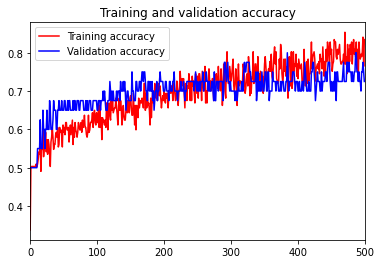

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlim(0, 500, 100)
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# prediction

In [ ]:
output = model.predict_generator(test_set, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_set.class_indices)
print(output)

{'0': 0, '1': 1, '2': 2}
[[0.898 0.088 0.014]
 [0.297 0.232 0.471]
 [0.914 0.072 0.014]
 [0.467 0.328 0.205]
 [0.790 0.148 0.062]
 [0.973 0.021 0.005]
 [0.615 0.266 0.119]
 [0.656 0.275 0.068]
 [0.874 0.101 0.025]
 [0.785 0.169 0.046]
 [0.902 0.078 0.020]
 [0.515 0.310 0.175]
 [0.722 0.221 0.057]
 [0.915 0.067 0.018]
 [0.898 0.081 0.021]
 [0.923 0.060 0.017]
 [0.680 0.236 0.084]
 [0.678 0.237 0.085]
 [0.470 0.350 0.179]
 [0.740 0.207 0.053]
 [0.847 0.121 0.032]
 [0.739 0.196 0.065]
 [0.463 0.343 0.195]
 [0.574 0.231 0.195]
 [0.371 0.346 0.283]
 [0.612 0.277 0.110]
 [0.591 0.255 0.154]
 [0.535 0.336 0.129]
 [0.303 0.267 0.430]
 [0.463 0.386 0.151]
 [0.158 0.138 0.705]
 [0.070 0.042 0.888]
 [0.322 0.256 0.423]
 [0.373 0.346 0.281]
 [0.249 0.241 0.510]
 [0.238 0.219 0.543]
 [0.298 0.313 0.389]
 [0.892 0.079 0.029]
 [0.033 0.019 0.947]
 [0.325 0.289 0.385]]


In [ ]:
test_set.reset()
pred = model.predict_generator(test_set, steps = 5,)

In [ ]:
predicted_class_indices

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2])

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:200]
filenames = test_set.filenames

In [ ]:
print(len(filenames), len(predictions))
# (200, 200)

40 40


In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("prediction_results.csv",index=False)